In [3]:
import os
import numpy as np


import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [4]:
count = 0 
dataset_path = 'C:\\Users\\Model\\datasets'

dirs = os.listdir(dataset_path)
for dir in dirs:
    dir_path = os.path.join(dataset_path, dir)  # Properly join paths
    files = list(os.listdir(dir_path))
    
    print(f'{dir} Folder has {len(files)} Images')
    count += len(files)

print(f'Dataset Folder has {count} Images')

Brown Planthopper Folder has 485 Images
green leaf hopper Folder has 178 Images
rice black bug Folder has 406 Images
rice bug Folder has 108 Images
White yellow stemborer Folder has 707 Images
Dataset Folder has 1884 Images


In [5]:
# Define parameters
base_dir = 'C:\\Users\\Model\\datasets'
img_size = 180
batch = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.3,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.3,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 1865 files belonging to 5 classes.
Using 1306 files for training.
Found 1865 files belonging to 5 classes.
Using 559 files for validation.


In [7]:
pest_names = train_ds.class_names
pest_names

['Brown Planthopper',
 'White yellow stemborer',
 'green leaf hopper',
 'rice black bug',
 'rice bug']

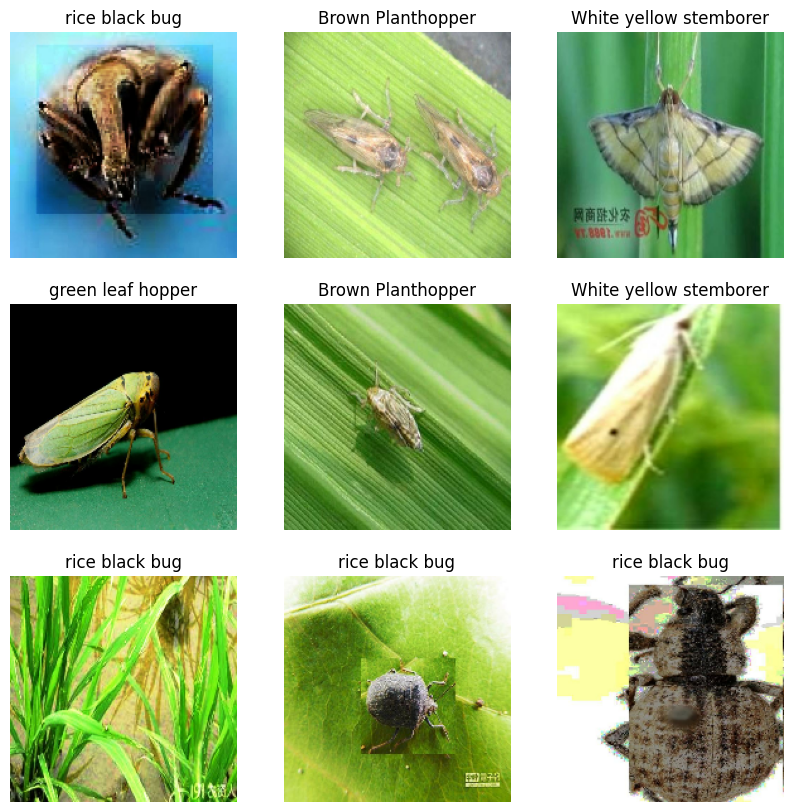

In [8]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(pest_names[labels[i]])
        plt.axis('off')

In [9]:

# Cache and prefetch data
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
# Create data augmentation layer
data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [1]:
# Create and build model
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

# Build the model with sample data
sample_data = tf.random.normal([1, img_size, img_size, 3])
model(sample_data)

# Compile model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Show model summary
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
# Train the model
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.3174 - loss: 1.8921 - val_accuracy: 0.4526 - val_loss: 1.3800
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4556 - loss: 1.3243 - val_accuracy: 0.4937 - val_loss: 1.2239
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.5018 - loss: 1.2044 - val_accuracy: 0.5259 - val_loss: 1.1408
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.5275 - loss: 1.0861 - val_accuracy: 0.5528 - val_loss: 1.1573
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.5994 - loss: 0.9887 - val_accuracy: 0.5832 - val_loss: 1.0139
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6110 - loss: 0.9722 - val_accuracy: 0.6351 - val_loss: 0.9535
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.6362 - loss: 0.9130 - val_accuracy: 0.6225 - val_loss: 1.0299
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.6360 - loss: 0.8890 - val_accuracy: 0.6404 - v

In [ ]:
# Save the model
model.save("C:\\Users\\Admin\\Documents\\models\\model-api\\model_list\\model.keras")